In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [174]:
df=pd.read_csv('Train.csv')

In [175]:
df.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [176]:
df.isna().mean()

Applicant_ID      0.000000
form_field1       0.045161
form_field2       0.068643
form_field3       0.006339
form_field4       0.006339
form_field5       0.006339
form_field6       0.238571
form_field7       0.092196
form_field8       0.238571
form_field9       0.143000
form_field10      0.006339
form_field11      0.561089
form_field12      0.176696
form_field13      0.105161
form_field14      0.000000
form_field15      0.401339
form_field16      0.232786
form_field17      0.199125
form_field18      0.185750
form_field19      0.000071
form_field20      0.006339
form_field21      0.283107
form_field22      0.364286
form_field23      0.502196
form_field24      0.237446
form_field25      0.097321
form_field26      0.132821
form_field27      0.166054
form_field28      0.006339
form_field29      0.006339
form_field30      0.455518
form_field31      0.703714
form_field32      0.097321
form_field33      0.022429
form_field34      0.006339
form_field35      0.413357
form_field36      0.035625
f

In [177]:
# df=df[df.columns[df.isnull().mean()<=0.5]]
# df.head()

In [178]:
100*(df.default_status.value_counts()/len(df))

no     75.508929
yes    24.491071
Name: default_status, dtype: float64

In [179]:
for label,content in df.items():
    if pd.api.types.is_float_dtype(content):
        print(label)

form_field1
form_field2
form_field3
form_field4
form_field5
form_field6
form_field7
form_field8
form_field9
form_field10
form_field11
form_field12
form_field13
form_field15
form_field16
form_field17
form_field18
form_field19
form_field20
form_field21
form_field22
form_field23
form_field24
form_field25
form_field26
form_field27
form_field28
form_field29
form_field30
form_field31
form_field32
form_field33
form_field34
form_field35
form_field36
form_field37
form_field38
form_field39
form_field40
form_field41
form_field42
form_field43
form_field44
form_field45
form_field46
form_field48
form_field49
form_field50


In [180]:
for label,content in df.items():
    if  not pd.api.types.is_float_dtype(content):
        print(label)

Applicant_ID
form_field14
form_field47
default_status


In [181]:
df.drop('Applicant_ID',axis=1,inplace=True)


In [182]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

form_field47
default_status


In [183]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes

In [184]:
df.head(10)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0
5,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,...,0.030558,12.12,0.382960,NaN,0.0,1,NaN,0.000000,NaN,0
6,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,580388.0,...,0.660000,1.01,0.513504,NaN,0.0,0,NaN,2.146512,0.004390,1
7,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,326760.0,...,0.137500,3.03,0.635960,NaN,0.0,0,155.295994,0.946074,0.128389,0
8,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,1557167.0,...,0.471427,4.04,0.410880,0.0,0.0,0,NaN,0.641601,0.009990,0
9,3310.0,0.24395,0.1562,0.0,0.0000,NaN,0.0,NaN,NaN,0.0,...,0.825000,1.01,0.800000,NaN,NaN,0,NaN,0.000000,NaN,1


In [185]:
print('training data uses {0} Mb'.format(df.memory_usage().sum()/1024**2))

training data uses 21.0419921875 Mb


In [186]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label +"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [187]:
def convert_som_float_to_int(df):
    float_cols=['form_field2','form_field3','form_field4','form_field5','form_field21','form_field22','form_field24',
        'form_field25','form_field33','form_field42','form_field43','form_field44','form_field48',
        'form_field49','form_field50']

    int_cols=df.columns.drop(float_cols)

    df.loc[:,int_cols]=df.loc[:,int_cols].astype('uint16')
    
    return df
    
    



In [188]:
df=convert_som_float_to_int(df)

In [189]:
print('training data uses {0} Mb'.format(df.memory_usage().sum()/1024**2))

training data uses 15.3809814453125 Mb


In [190]:
df.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40_is_missing,form_field41_is_missing,form_field42_is_missing,form_field43_is_missing,form_field44_is_missing,form_field45_is_missing,form_field46_is_missing,form_field48_is_missing,form_field49_is_missing,form_field50_is_missing
0,3436,0.28505,1.6560,0.0,0.000,0,7352,55464,12936,60934,...,1,1,0,0,0,0,0,1,0,0
1,3456,0.67400,0.2342,0.0,0.000,0,47011,38779,29846,42800,...,1,1,0,0,0,1,0,0,0,0
2,3276,0.53845,3.1510,0.0,6.282,49997,39436,46438,61872,31288,...,0,1,0,0,0,0,0,1,0,0
3,3372,0.17005,0.5050,0.0,0.000,61094,30047,57819,54312,17499,...,1,1,0,0,0,1,0,0,0,0
4,3370,0.77270,1.1010,0.0,0.000,1556,18120,18120,38905,34090,...,0,1,0,0,0,0,0,0,0,0


In [191]:
df.isna().sum()

form_field1                0
form_field2                0
form_field3                0
form_field4                0
form_field5                0
                          ..
form_field45_is_missing    0
form_field46_is_missing    0
form_field48_is_missing    0
form_field49_is_missing    0
form_field50_is_missing    0
Length: 99, dtype: int64

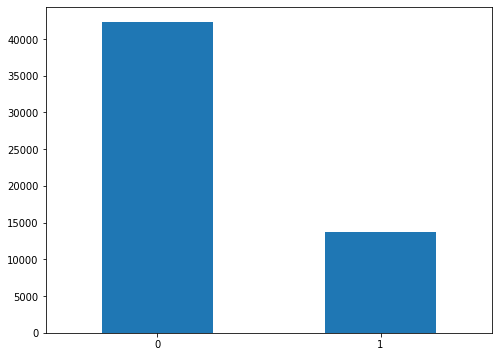

In [192]:
df.default_status.value_counts().plot.bar(figsize=(8,6))
plt.xticks(rotation=0);

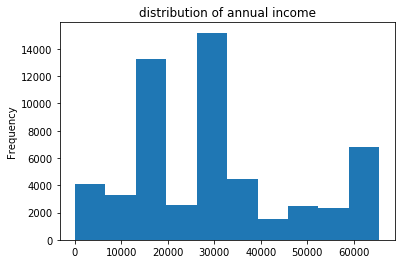

In [193]:
df.form_field14.plot(kind='hist',title='distribution of annual income');

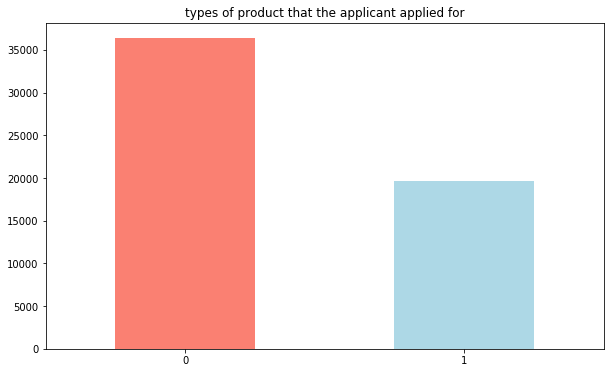

In [194]:
df.form_field47.value_counts().plot(kind='bar',title='types of product that the applicant applied for',color=['salmon','lightblue'],figsize=(10,6))
#plt.legend(['charge','lending'],loc=1)
plt.xticks(rotation=0)
plt.show();

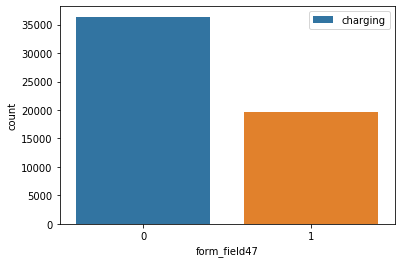

In [195]:
sns.countplot(x='form_field47',data=df)
plt.legend(('charging','lending'));

In [196]:
df_corr=df.corr()
df_corr

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40_is_missing,form_field41_is_missing,form_field42_is_missing,form_field43_is_missing,form_field44_is_missing,form_field45_is_missing,form_field46_is_missing,form_field48_is_missing,form_field49_is_missing,form_field50_is_missing
form_field1,1.000000,-0.254693,-0.497516,-0.274934,-0.237943,0.019942,0.139815,-0.084477,0.176464,0.211256,...,0.150109,-0.065887,0.023585,0.010213,-0.252046,-0.351568,-0.068471,-0.252769,-0.003228,-0.199397
form_field2,-0.254693,1.000000,0.122363,0.092037,0.040086,-0.102260,-0.012416,-0.019751,-0.021191,-0.020591,...,-0.078203,-0.065380,-0.007134,-0.003331,-0.012577,0.140887,-0.025716,-0.087735,-0.018888,-0.005985
form_field3,-0.497516,0.122363,1.000000,0.377243,0.649898,0.069990,-0.087674,0.062620,-0.081045,-0.120947,...,-0.163693,0.055391,-0.072649,-0.047590,0.121132,0.128375,-0.031915,0.216210,-0.036684,0.108036
form_field4,-0.274934,0.092037,0.377243,1.000000,0.099723,0.040253,-0.046246,0.035196,-0.061027,-0.049919,...,-0.072951,-0.016840,-0.041229,-0.027219,0.052265,0.074493,-0.169350,0.130736,-0.021477,0.078619
form_field5,-0.237943,0.040086,0.649898,0.099723,1.000000,0.051749,-0.059739,0.039368,-0.068623,-0.080681,...,-0.156538,0.042577,-0.028763,-0.018776,0.076944,0.104153,0.030669,0.119101,-0.014815,0.104040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
form_field45_is_missing,-0.351568,0.140887,0.128375,0.074493,0.104153,0.027179,-0.082139,0.042826,-0.144969,-0.132088,...,-0.102660,0.096682,0.135019,0.089868,0.210690,1.000000,0.259064,0.083611,0.070910,0.217864
form_field46_is_missing,-0.068471,-0.025716,-0.031915,-0.169350,0.030669,0.080795,-0.090947,0.045169,-0.118562,-0.146853,...,0.029004,0.429400,0.220132,0.155195,0.273156,0.259064,1.000000,0.099206,0.126823,0.231407
form_field48_is_missing,-0.252769,-0.087735,0.216210,0.130736,0.119101,0.324929,-0.149580,0.214725,-0.233356,-0.215909,...,0.004937,0.117643,0.079136,0.077434,0.366295,0.083611,0.099206,1.000000,0.103553,0.467701
form_field49_is_missing,-0.003228,-0.018888,-0.036684,-0.021477,-0.014815,0.066237,-0.053520,0.049536,-0.105898,0.035034,...,0.042311,0.054458,0.489777,0.789055,0.244927,0.070910,0.126823,0.103553,1.000000,0.161042


In [197]:
np.random.seed(42)
df=df.sample(frac=1)
x=df.drop('default_status',axis=1)
y=df.default_status
train_split=round(0.8*len(df))
x_train,y_train=df.drop('default_status',axis=1)[:train_split],df.default_status[:train_split]
x_valid,y_valid=df.drop('default_status',axis=1)[train_split:],df.default_status[train_split:]

In [198]:
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_valid=sc.transform(x_valid)

In [199]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression

clf1=LogisticRegression(max_iter=1000)
clf1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [200]:
np.random.seed(42)
y_preds=clf1.predict(x_valid)
print(classification_report(y_valid,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      8513
           1       0.64      0.42      0.50      2687

    accuracy                           0.80     11200
   macro avg       0.73      0.67      0.69     11200
weighted avg       0.79      0.80      0.79     11200



In [201]:
len(y_preds),len(y_valid)

(11200, 11200)

In [202]:
confusion_matrix(y_valid,y_preds)

array([[7871,  642],
       [1570, 1117]], dtype=int64)

In [203]:
conf_mat=pd.crosstab(y_valid,y_preds,rownames=['predicted_label'],colnames=['actual_label'])
conf_mat

actual_label,0,1
predicted_label,,
0,7871,642
1,1570,1117


(2.0, 0.0)

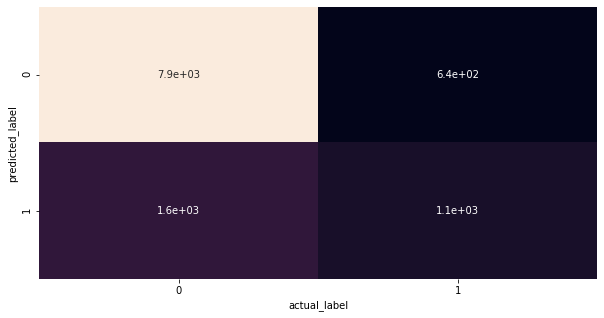

In [204]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(conf_mat,cbar=False,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)

In [247]:
np.random.seed(42)
y_preds_prob=clf1.predict_proba(x_train)
y_preds_prob_pos=y_preds_prob[:,1]

In [248]:
np.random.seed(42)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_preds_prob_pos)

0.8329664047683089

In [133]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(x_train,y_train)


RandomForestClassifier()

In [134]:
np.random.seed(42)
from sklearn.metrics import classification_report,confusion_matrix
y_preds_rf=clf2.predict(x_valid)
print(classification_report(y_valid,y_preds_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8513
           1       0.66      0.40      0.50      2687

    accuracy                           0.81     11200
   macro avg       0.75      0.67      0.69     11200
weighted avg       0.79      0.81      0.79     11200



In [135]:
np.random.seed(42)
from sklearn.metrics import roc_auc_score
y_preds_prob=clf2.predict_proba(x_valid)
y_preds_prob_pos=y_preds_prob[:,1]
roc_auc_score(y_valid,y_preds_prob_pos)

0.8238656515652782

In [136]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [137]:
np.random.seed(42)
from sklearn.metrics import classification_report,confusion_matrix
y_preds_dtc=dtc.predict(x_valid)
print(classification_report(y_valid,y_preds_dtc))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8513
           1       0.43      0.45      0.44      2687

    accuracy                           0.73     11200
   macro avg       0.63      0.63      0.63     11200
weighted avg       0.73      0.73      0.73     11200



In [138]:
np.random.seed(42)
from sklearn.metrics import roc_auc_score
y_preds_prob=dtc.predict_proba(x_valid)
y_preds_prob_pos=y_preds_prob[:,1]
roc_auc_score(y_valid,y_preds_prob_pos)

0.6302829346880803

In [88]:
# creating hyperparameter tuning for logistic regression
log_reg_grid={'C':[1.0,1.5,2.0,2.5],
             'solver':['liblinear'],
             'penalty':['l1','l2']}

#creating hyperparameter tuning for random forest classifier
rf_grid={'n_estimators':[100,200,300,1000],
         'max_depth':[None,3,5,10],
         'min_samples_split':[3,5,10],
         'min_samples_leaf':[4,10,8],
         'max_features':['auto','sqrt',20,40],
        'bootstrap':[True]}


In [89]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(max_iter=1000,multi_class='ovr'),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(x_train[:10000],y_train[:10000])

C:\Users\proo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   45.5s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                multi_class='ovr'),
                   n_iter=20,
                   param_distributions={'C': [1.0, 1.5, 2.0, 2.5],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [90]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}

In [93]:
clf=LogisticRegression(C=1.0,solver='liblinear',penalty='l1',max_iter=1000)
clf.fit(x_train,y_train)
#cross validated accuracy
cv_auc=np.mean(cross_val_score(clf,x_valid,y_valid,cv=5,scoring='roc_auc'))
cv_auc

0.8255253429268811

In [94]:
# y_preds_prob_rs_log_reg=rs_log_reg.predict_proba(x_valid)[:,1]
# roc_auc_score(y_valid,y_preds_prob_rs_log_reg)

In [95]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(x_train[:10000],y_train[:10000])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 20,
                                                         40],
                                        'min_samples_leaf': [4, 10, 8],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [100, 200, 300, 1000]},
                   verbose=True)

In [96]:
rs_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 20,
 'max_depth': 10,
 'bootstrap': True}

In [97]:
clf2=RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=8,max_features=20,max_depth=10,bootstrap=True)
clf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=300)

In [98]:
cv_auc_rf=np.mean(cross_val_score(clf2,x_valid,y_valid,cv=5,scoring='roc_auc'))
cv_auc_rf

0.8232627232814975

In [214]:
x=np.array([[1,2,3],[4,5,7]])
x.sum(axis=0)



array([ 5,  7, 10])

In [219]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [222]:
y_pred = model.predict_proba(x_valid)
y_pred[:10]

array([[7.5450063e-02, 9.2454994e-01],
       [5.5294418e-01, 4.4705585e-01],
       [9.9928916e-01, 7.1082107e-04],
       [9.5723486e-01, 4.2765159e-02],
       [9.4753748e-01, 5.2462537e-02],
       [9.5769370e-01, 4.2306304e-02],
       [9.3097389e-01, 6.9026127e-02],
       [8.6221105e-01, 1.3778894e-01],
       [7.0448458e-01, 2.9551545e-01],
       [9.2512441e-01, 7.4875601e-02]], dtype=float32)

In [225]:
# evaluate predictions
roc =roc_auc_score(y_valid, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 82.22%


In [226]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [229]:
# fit the model
model_cv.fit(x_train[:10000], y_train[:10000])  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [230]:
cv_results=pd.DataFrame(model_cv.cv_results_)

In [231]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.037016,0.228031,0.029662,0.003762,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.804455,0.822099,0.806480,...,0.808767,0.007325,3,0.880231,0.879410,0.881012,0.881906,0.879011,0.880314,0.001053
1,3.612552,0.142673,0.026946,0.003609,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.808237,0.832234,0.810714,...,0.815666,0.008920,2,0.889434,0.888275,0.891161,0.890239,0.888770,0.889576,0.001031
2,3.405383,0.179424,0.027044,0.001766,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.810460,0.833012,0.816183,...,0.819014,0.008506,1,0.889058,0.888644,0.891217,0.889588,0.891240,0.889949,0.001086
3,3.026884,0.159223,0.025365,0.004574,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.762119,0.771594,0.755738,...,0.761434,0.008488,6,0.878557,0.887165,0.877601,0.888753,0.882260,0.882867,0.004467
4,3.604521,0.165450,0.029787,0.010672,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.784339,0.793105,0.789798,...,0.788020,0.004992,5,0.923525,0.924404,0.921596,0.922192,0.922840,0.922911,0.000986
5,3.400523,0.149741,0.023297,0.001791,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.795046,0.806113,0.791384,...,0.794249,0.006331,4,0.934735,0.935833,0.940046,0.937106,0.934339,0.936412,0.002056


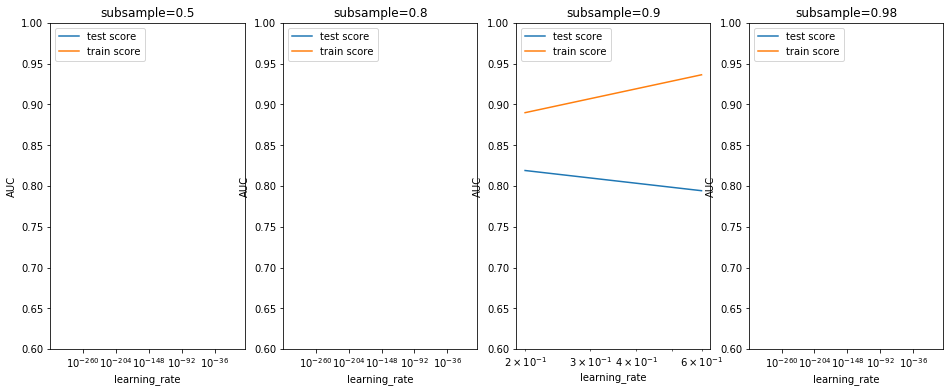

In [244]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.4,0.6,0.8, 1.0], 
             'subsample': [0.5, 0.8, 0.9,0.98]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [237]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(x_train, y_train)

[23:54:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [238]:
# predict
y_pred = model.predict_proba(x_valid)
y_pred[:10]

array([[7.5450063e-02, 9.2454994e-01],
       [5.5294418e-01, 4.4705585e-01],
       [9.9928916e-01, 7.1082107e-04],
       [9.5723486e-01, 4.2765159e-02],
       [9.4753748e-01, 5.2462537e-02],
       [9.5769370e-01, 4.2306304e-02],
       [9.3097389e-01, 6.9026127e-02],
       [8.6221105e-01, 1.3778894e-01],
       [7.0448458e-01, 2.9551545e-01],
       [9.2512441e-01, 7.4875601e-02]], dtype=float32)

In [240]:
# roc_auc
auc = roc_auc_score(y_valid, y_pred[:, 1])
auc

0.8222445620614562